In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.network import Network
from src.data import Data
from src.tools import shade
import matplotlib

In [2]:
X = np.transpose(np.genfromtxt("xi.csv", delimiter=","))
Y = np.transpose(np.genfromtxt("tau.csv", delimiter=","))
N = 50

In [3]:
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

In [4]:
network = Network(N)

train, test = Data.sample(X, Y)
train_errors, test_errors = network.train(train, test, t_max=100)

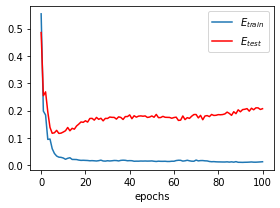

In [5]:
plt.figure(figsize=(4, 3))
plt.plot(train_errors, label="$E_{train}$")
plt.plot(test_errors, label="$E_{test}$", c="red")
plt.xlabel("epochs")
plt.legend()
plt.tight_layout()
# plt.savefig("pictures/train_base_error.pgf")

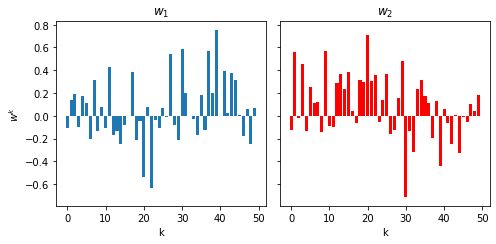

In [6]:
fig, plots = plt.subplots(1, 2, figsize=(7, 3.5), sharey=True)
colors = [None, "red"]
for i, (plot, layer, color) in enumerate(zip(plots, network.layers, colors)):
    plot.bar(np.arange(N), layer.weights, color=color)
    plot.set_xlabel("k")
    plot.set_title(f"$w_{i + 1}$")
plots[0].set_ylabel("$w^k$")
plt.tight_layout()
# plt.savefig("pictures/train_base_weight_vectors.pgf")

[-0.10556425  0.14252784  0.18774682 -0.09512057  0.17058028  0.11286842
 -0.20149395  0.31093208 -0.13241438  0.07599677 -0.11110342  0.42650516
 -0.17192893 -0.13330588 -0.245151   -0.08075049 -0.00562154  0.38116494
 -0.21443359 -0.0453087  -0.5365784   0.08025523 -0.63221016 -0.03971306
 -0.11059726  0.06543139 -0.00803909  0.54035512 -0.0820032  -0.21093209
  0.58306753  0.20325813 -0.00575854 -0.02720961 -0.16868839  0.18496956
 -0.12187648  0.56996487  0.2033959   0.75561682  0.0008675   0.38928628
  0.0233778   0.37294701  0.31352381  0.00760107 -0.17638719  0.05934018
 -0.25038784  0.06906573]
[-0.12607735  0.56405987 -0.01910606  0.45847372 -0.13701656  0.25587555
  0.11240175  0.1201582  -0.13945021  0.56523498 -0.09077446 -0.0979155
  0.28917522  0.36290238  0.23577965  0.38889893  0.0453646  -0.05927471
  0.31818811  0.29394671  0.70770143  0.30894822  0.3624195  -0.05068668
  0.13704401  0.36821043 -0.16266182 -0.12072011  0.1583928   0.48124209
 -0.71672809 -0.13313037 -

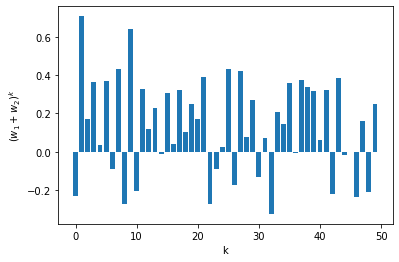

In [7]:
plt.close()
print(network.layers[0].weights)
print(network.layers[1].weights)
plt.bar(np.arange(N), np.sum(np.array([network.layers[0].weights, network.layers[1].weights]), axis=0))
plt.xlabel("k")
plt.ylabel("$(w_1+w_2)^k$")
plt.show()
# plt.savefig("pictures/train_base_weight_vectors_sum.pgf")

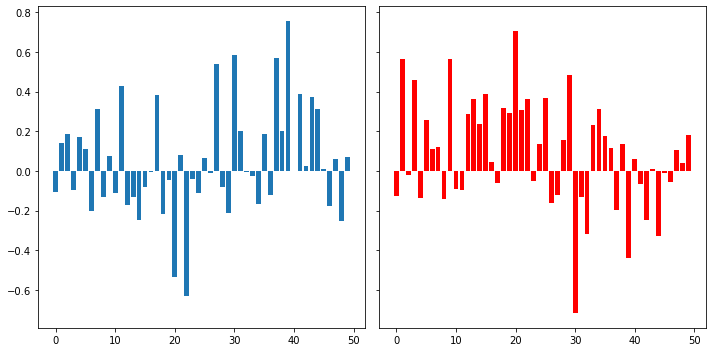

In [8]:
fig, plots = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
colors = [None, "red"]
for plot, layer, color in zip(plots, network.layers, colors):
    plot.bar(np.arange(N), layer.weights, color=color)
plt.tight_layout()

In [9]:
P_range = np.array([20, 50, 200, 500, 1000, 2000])
n = 10

train_errors = []
test_errors = []

for P in P_range:
    print(f"Doing {P = }")
    
    train_errors_acc = []
    test_errors_acc = []

    for _ in range(n):
        network = Network(N)
        train, test = Data.sample(X, Y, P=P)
        train_error, test_error = network.train(train, test)

        train_errors_acc.append(train_error)
        test_errors_acc.append(test_error)

    train_errors.append(np.mean(train_errors_acc, axis=0))
    test_errors.append(np.mean(test_errors_acc, axis=0))

Doing P = 20
Doing P = 50
Doing P = 200
Doing P = 500
Doing P = 1000
Doing P = 2000


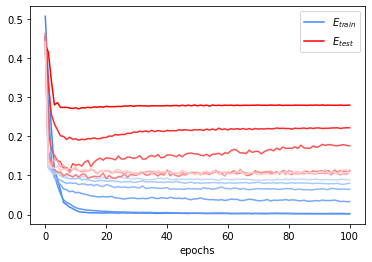

In [10]:
colors = shade("#4287f5", "#c2d9ff", P_range.size)

for i, (train_error, test_error, P, color) in enumerate(zip(train_errors, test_errors, P_range, colors)):
    plt.plot(train_error, c=color, label="$E_{train}$" if i == 0 else None)

colors = shade("#ff0000", "#ffcccc", P_range.size)

for i, (train_error, test_error, P, color) in enumerate(zip(train_errors, test_errors, P_range, colors)):
    plt.plot(test_error, c=color, label="$E_{test}$" if i == 0 else None)

plt.xlabel("epochs")
plt.legend()
# plt.savefig("pictures/effect_p.pgf")

<BarContainer object of 50 artists>

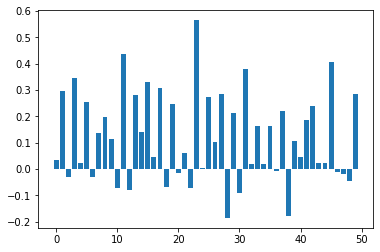

In [11]:
max_w = None
min_w = None

weights_sum = np.sum([layer.weights for layer in network.layers], axis=0)
plt.bar(np.arange(N), weights_sum)